In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('peak.csv')

df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%H:%M:%S")

df["Observed State"] = df["Observed State"].str.capitalize()

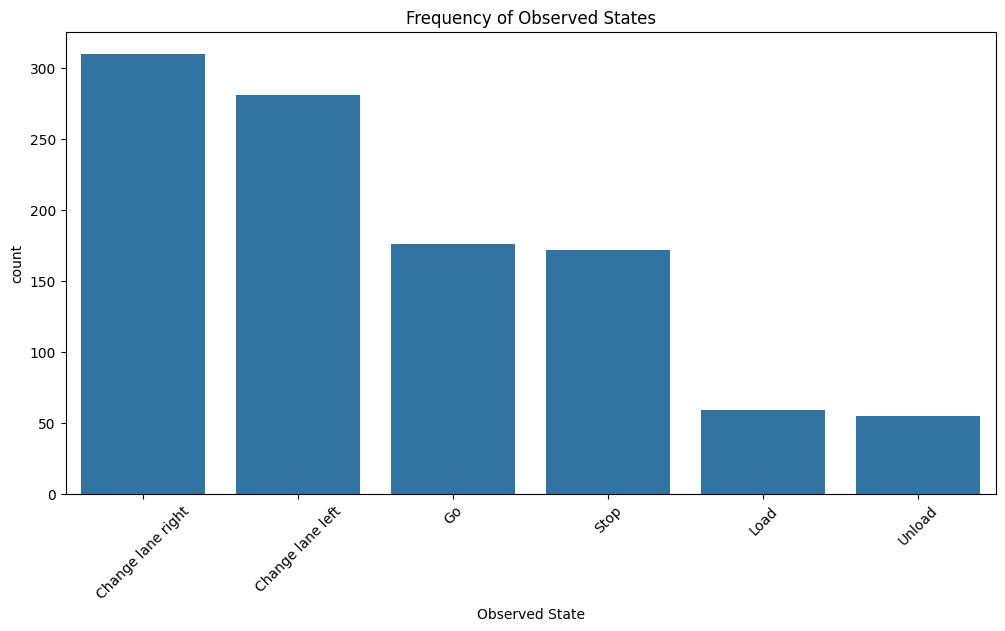

Observed State
Change lane right    310
Change lane left     281
Go                   176
Stop                 172
Load                  59
Unload                55
Name: count, dtype: int64


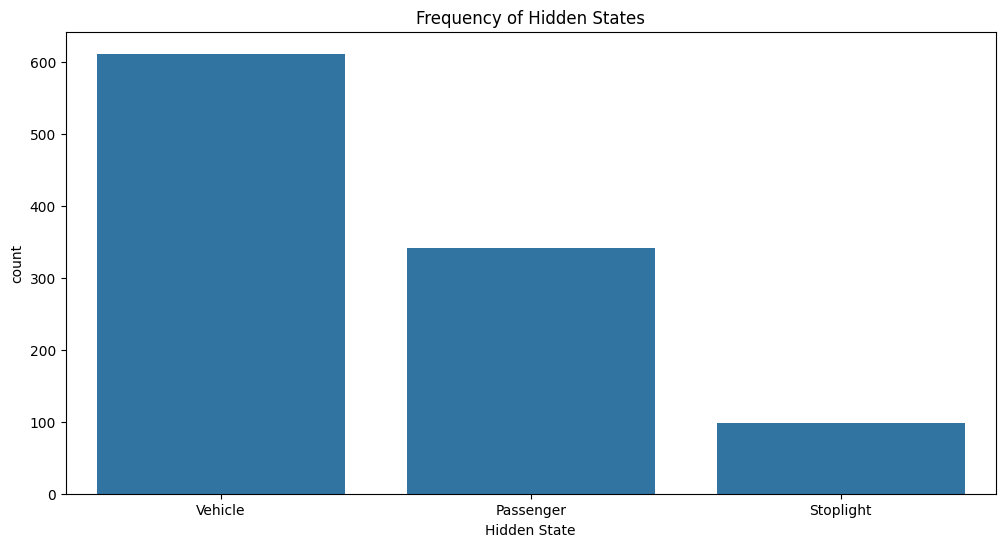

Hidden State Counts:
 Hidden State
Vehicle      612
Passenger    342
Stoplight     99
Name: count, dtype: int64


In [3]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Observed State", order=df["Observed State"].value_counts().index)
plt.title("Frequency of Observed States")
plt.xticks(rotation=45)
plt.show()
state_counts = df["Observed State"].value_counts()
print(state_counts)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Hidden State", order=df["Hidden State"].value_counts().index)
plt.title("Frequency of Hidden States")
plt.show()
hidden_state_counts = df["Hidden State"].value_counts()
print("Hidden State Counts:\n", hidden_state_counts)

# # Duration of each state
# plt.figure(figsize=(12, 6))
# state_duration.plot(kind='bar')
# plt.title("Duration of Each Observed State")
# plt.ylabel("Duration (seconds)")
# plt.show()


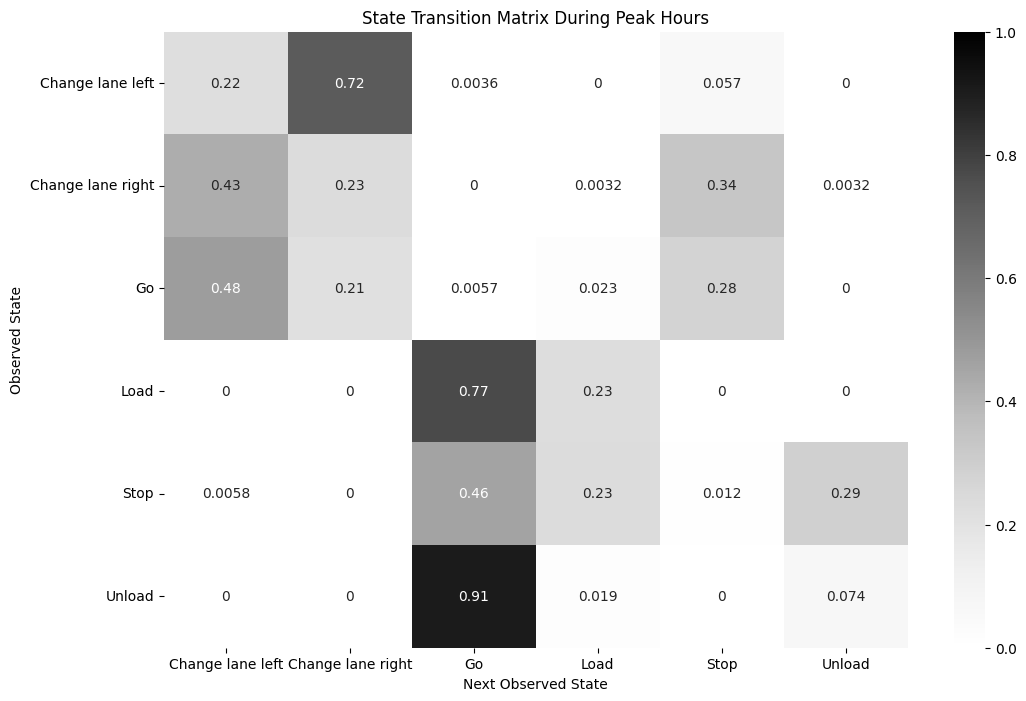

In [4]:
df["Next Observed State"] = df["Observed State"].shift(-1)

df = df.dropna()

transition_matrix = pd.crosstab(df["Observed State"], df["Next Observed State"], normalize='index')

plt.figure(figsize=(12, 8))
sns.heatmap(transition_matrix, annot=True, cmap="Greys", cbar=True, vmin=0, vmax=1)
plt.title("State Transition Matrix During Peak Hours")
plt.show()

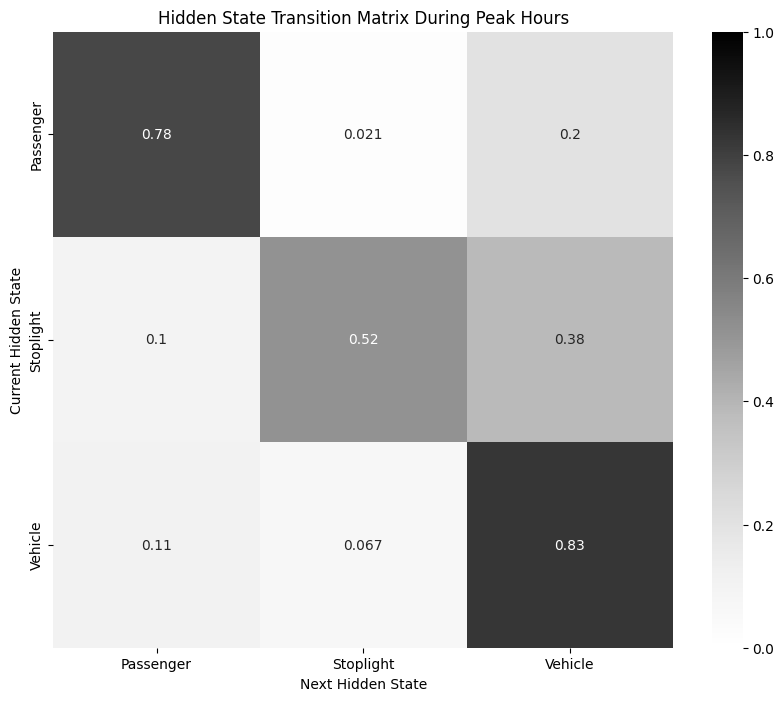

In [5]:
df["Next Hidden State"] = df["Hidden State"].shift(-1)

df = df.dropna()

hidden_state_transition_matrix = pd.crosstab(df["Hidden State"], df["Next Hidden State"], normalize='index')

plt.figure(figsize=(10, 8))
sns.heatmap(hidden_state_transition_matrix, annot=True, cmap="Greys", cbar=True, vmin=0, vmax=1)
plt.title("Hidden State Transition Matrix During Peak Hours")
plt.xlabel("Next Hidden State")
plt.ylabel("Current Hidden State")
plt.show()

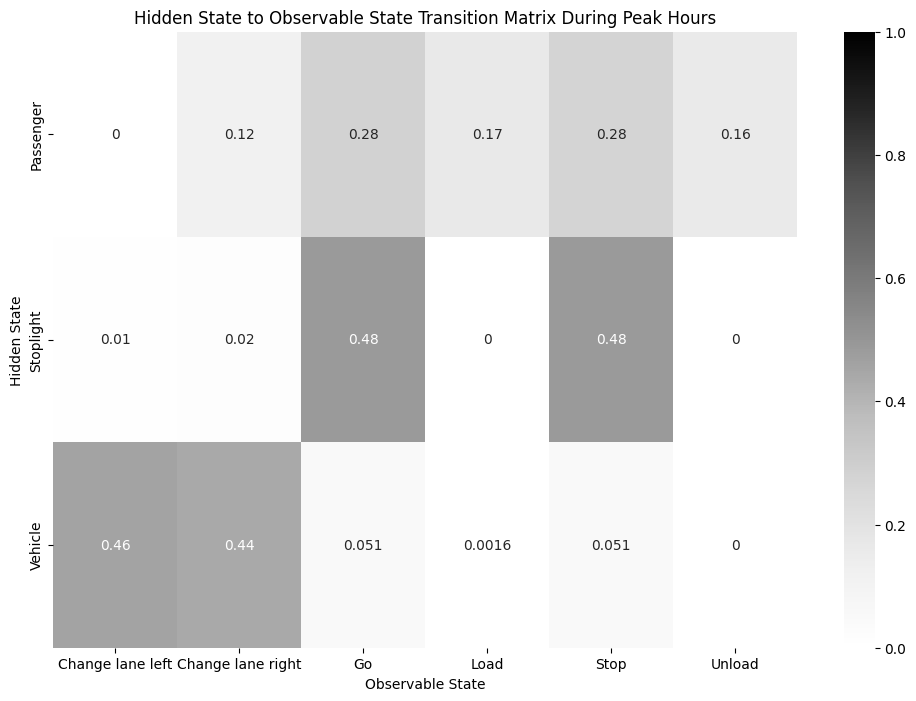

In [6]:
hidden_to_observed_matrix = pd.crosstab(df["Hidden State"], df["Observed State"], normalize='index')

plt.figure(figsize=(12, 8))
sns.heatmap(hidden_to_observed_matrix, annot=True, cmap="Greys", cbar=True, vmin=0, vmax=1)
plt.title("Hidden State to Observable State Transition Matrix During Peak Hours")
plt.xlabel("Observable State")
plt.ylabel("Hidden State")
plt.show()

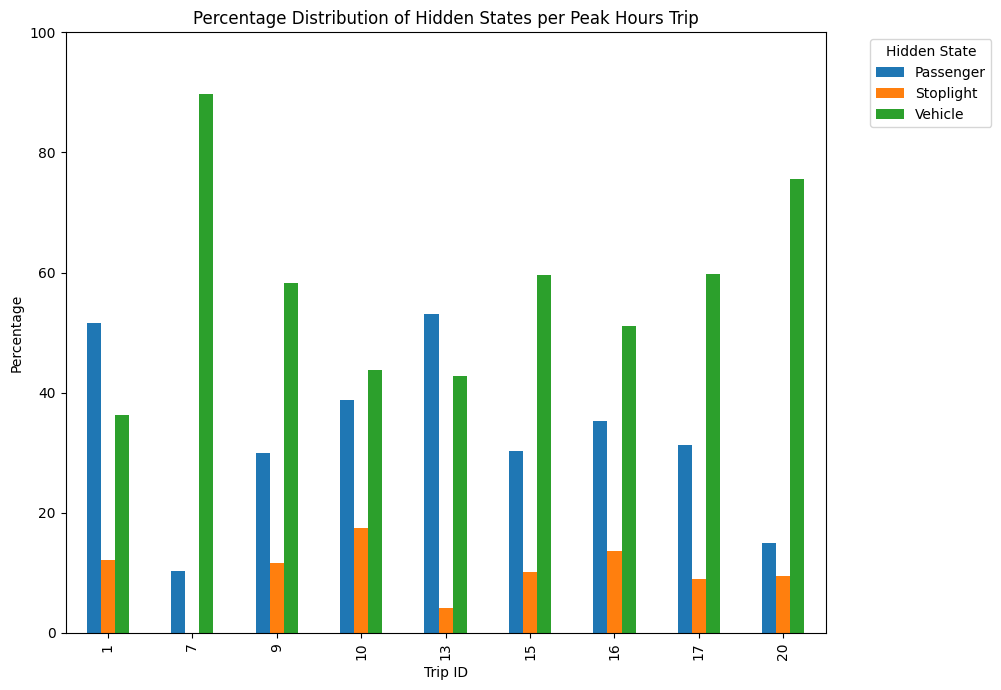

In [7]:
trip_counts = df.groupby(['Trip ID', 'Hidden State']).size().unstack(fill_value=0)

trip_percentages = trip_counts.div(trip_counts.sum(axis=1), axis=0) * 100

# Plot the distribution per trip as stacked bar graph
fig, ax = plt.subplots(figsize=(12, 7))  # Increase figure size to accommodate the legend
trip_percentages.plot(kind='bar', stacked=False, ax=ax)

# Place the legend on the side
ax.legend(title='Hidden State', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 20))

plt.xlabel('Trip ID')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Hidden States per Peak Hours Trip')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to make room for the legend

plt.show()

In [8]:
df = pd.read_csv('non_peak.csv')

df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%H:%M:%S")

df["Observed State"] = df["Observed State"].str.capitalize()

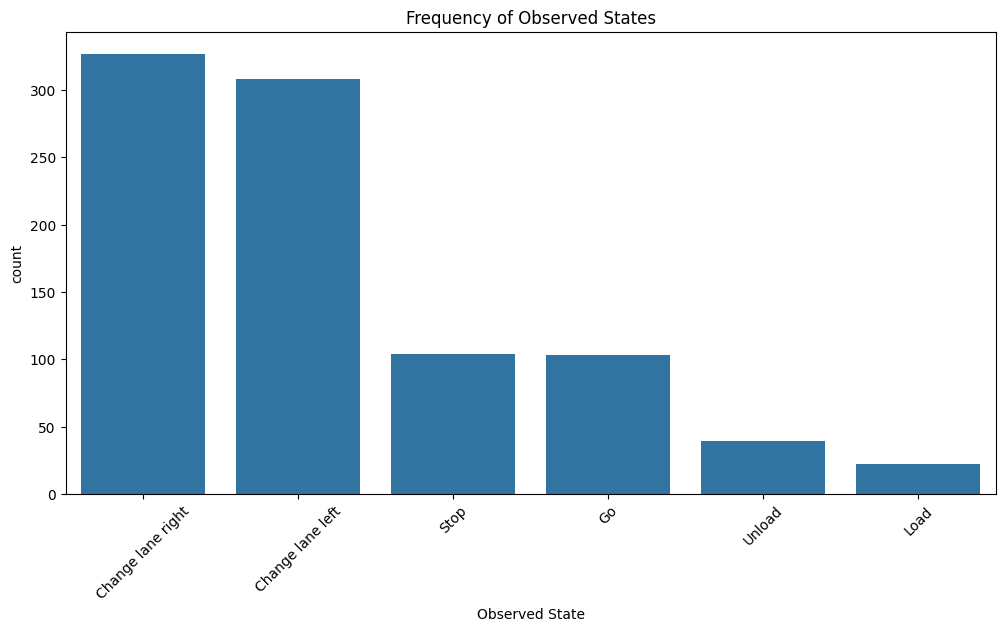

Observed State
Change lane right    327
Change lane left     308
Stop                 104
Go                   103
Unload                39
Load                  22
Name: count, dtype: int64


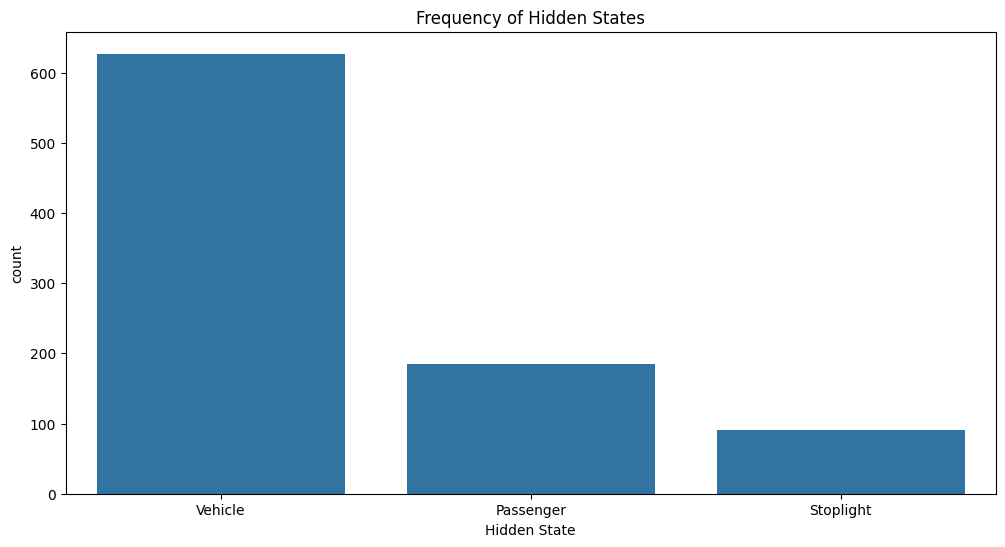

Hidden State Counts:
 Hidden State
Vehicle      627
Passenger    185
Stoplight     91
Name: count, dtype: int64


In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Observed State", order=df["Observed State"].value_counts().index)
plt.title("Frequency of Observed States")
plt.xticks(rotation=45)
plt.show()
state_counts = df["Observed State"].value_counts()
print(state_counts)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Hidden State", order=df["Hidden State"].value_counts().index)
plt.title("Frequency of Hidden States")
plt.show()
hidden_state_counts = df["Hidden State"].value_counts()
print("Hidden State Counts:\n", hidden_state_counts)

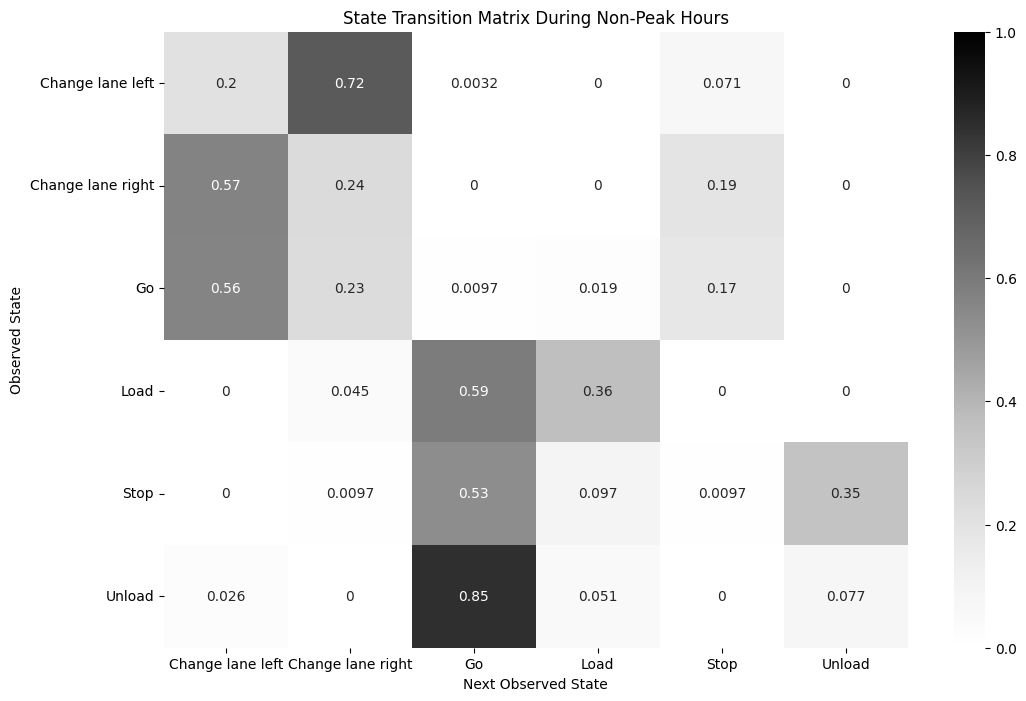

In [10]:
df["Next Observed State"] = df["Observed State"].shift(-1)

df = df.dropna()

transition_matrix = pd.crosstab(df["Observed State"], df["Next Observed State"], normalize='index')

plt.figure(figsize=(12, 8))
sns.heatmap(transition_matrix, annot=True, cmap="Greys", cbar=True, vmin=0, vmax=1)
plt.title("State Transition Matrix During Non-Peak Hours")
plt.show()

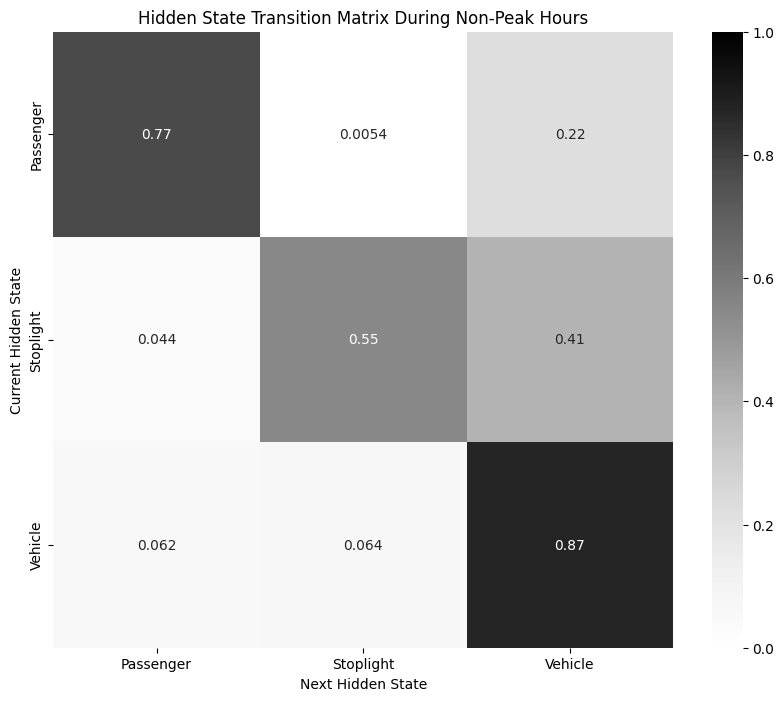

In [11]:
df["Next Hidden State"] = df["Hidden State"].shift(-1)

df = df.dropna()

hidden_state_transition_matrix = pd.crosstab(df["Hidden State"], df["Next Hidden State"], normalize='index')

plt.figure(figsize=(10, 8))
sns.heatmap(hidden_state_transition_matrix, annot=True, cmap="Greys", cbar=True, vmin=0, vmax=1)
plt.title("Hidden State Transition Matrix During Non-Peak Hours")
plt.xlabel("Next Hidden State")
plt.ylabel("Current Hidden State")
plt.show()

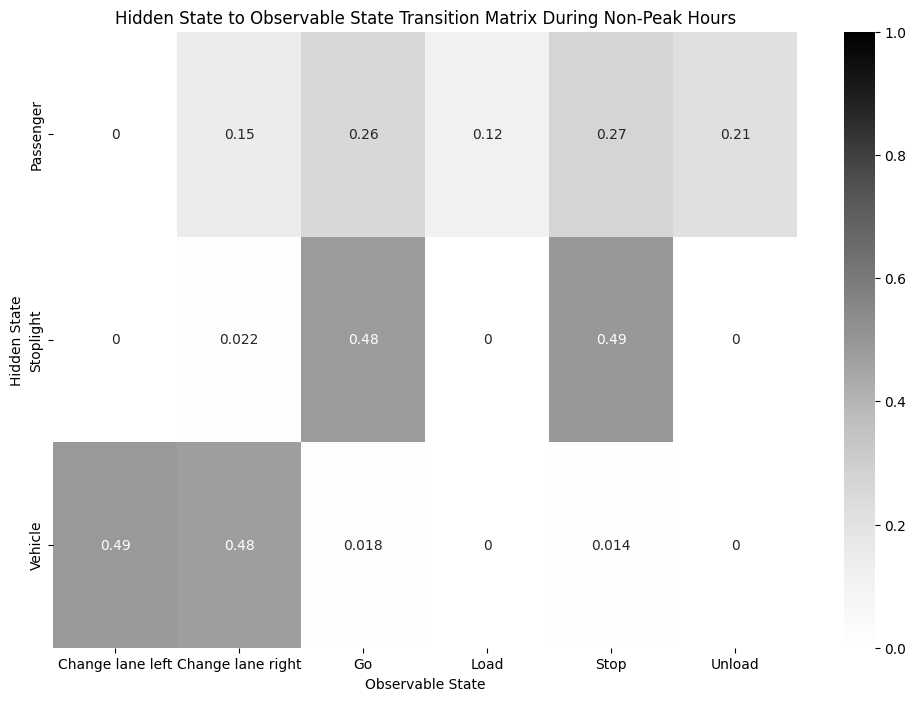

In [12]:
hidden_to_observed_matrix = pd.crosstab(df["Hidden State"], df["Observed State"], normalize='index')

plt.figure(figsize=(12, 8))
sns.heatmap(hidden_to_observed_matrix, annot=True, cmap="Greys", cbar=True, vmin=0, vmax=1)
plt.title("Hidden State to Observable State Transition Matrix During Non-Peak Hours")
plt.xlabel("Observable State")
plt.ylabel("Hidden State")
plt.show()

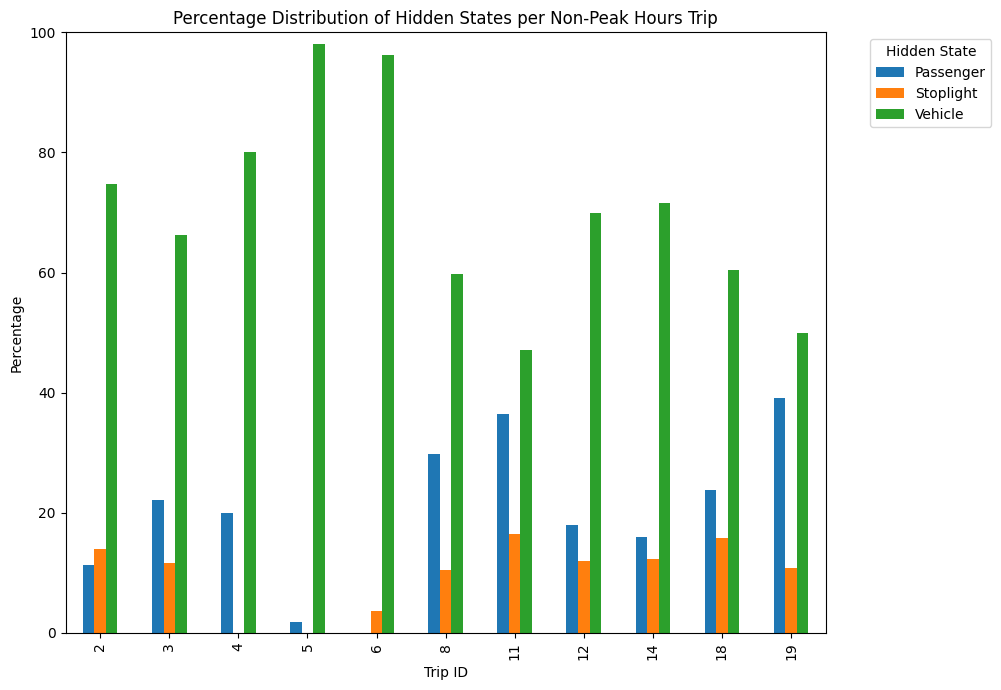

In [13]:
trip_counts = df.groupby(['Trip ID', 'Hidden State']).size().unstack(fill_value=0)

trip_percentages = trip_counts.div(trip_counts.sum(axis=1), axis=0) * 100

# Plot the distribution per trip as stacked bar graph
fig, ax = plt.subplots(figsize=(12, 7))  # Increase figure size to accommodate the legend
trip_percentages.plot(kind='bar', stacked=False, ax=ax)

# Place the legend on the side
ax.legend(title='Hidden State', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 20))

# Annotate the min and max lines

plt.xlabel('Trip ID')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Hidden States per Non-Peak Hours Trip')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to make room for the legend

plt.show()